In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
infection = pd.read_csv('Classeur1.csv', sep="\t",index_col='Date',parse_dates=True)

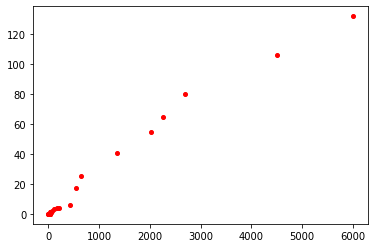

In [3]:
infection.head()
x=infection['Infected']
y=infection['Dead']
y = y.values.reshape(y.shape[0],1)
x = x.values.reshape(x.shape[0],1)
plt.plot(infection['Infected'],infection['Dead'],'ro', markersize=4)

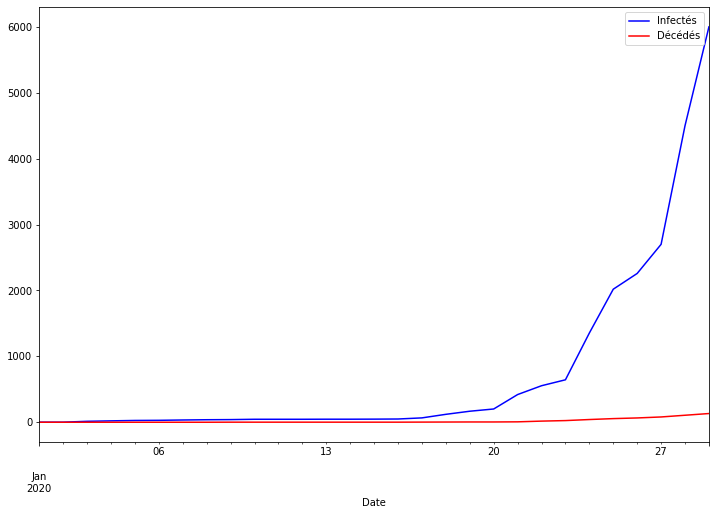

In [4]:
plt.figure(figsize=(12,8))
infection['Infected'].plot(label="Infectés",color='blue')
infection['Dead'].plot(label="Décédés",color='red')
plt.legend()

In [5]:
X = np.hstack((x,np.ones(x.shape)))
y = np.matrix([infection['Dead']]).T
X.shape, y

((29, 2), matrix([[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  1],
         [  1],
         [  1],
         [  1],
         [  1],
         [  1],
         [  1],
         [  1],
         [  2],
         [  3],
         [  4],
         [  4],
         [  6],
         [ 17],
         [ 25],
         [ 41],
         [ 55],
         [ 65],
         [ 80],
         [106],
         [132]]))

In [6]:
X.shape, y.shape

((29, 2), (29, 1))

In [7]:
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
theta

matrix([[0.02386866],
        [1.17530787]])

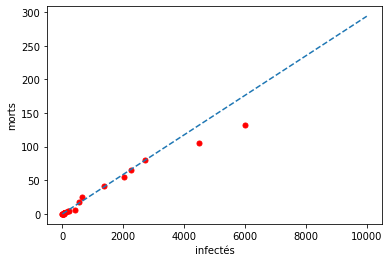

In [25]:
plt.xlabel('infectés')
plt.ylabel('morts')

plt.plot(x,y,'ro',markersize=5)
plt.plot([0,10000],[theta.item(0),theta.item(0)+250*theta.item(1)],linestyle="--")

In [35]:
mortPred = 0.023*7.53*10**9 + 1.17
#mortPred
mortPred = mortPred/(7.53*10**9)
mortPred*100

2.3000000155378486

In [8]:
def model(X,theta):
    return X.dot(theta)

In [9]:
model(X,theta)
#plt.plot(x,model(X,theta))

matrix([[  1.19917653],
        [  1.19917653],
        [  1.50946908],
        [  1.67654969],
        [  1.81976163],
        [  1.86749895],
        [  1.98684224],
        [  2.08231687],
        [  2.13005419],
        [  2.24939747],
        [  2.24939747],
        [  2.24939747],
        [  2.27326613],
        [  2.27326613],
        [  2.29713479],
        [  2.34487211],
        [  2.75063929],
        [  4.03954681],
        [  5.16137373],
        [  5.9729081 ],
        [ 11.20014416],
        [ 14.39854431],
        [ 16.54672351],
        [ 33.49347057],
        [ 49.36612803],
        [ 55.07073725],
        [ 65.62068401],
        [108.5842681 ],
        [144.38725484]])

In [10]:
def cost_function(X,y,theta):
    m = len(y)
    return 1/(2*m)*np.sum((model(X,theta)-y)**2)

In [11]:
cost_function(X,y,theta)

LinAlgError: Last 2 dimensions of the array must be square

In [ ]:
def grad(X,y,theta):
    m = len(y)
    return 1/m*X.T.dot(model(X,theta)- y)

In [ ]:
grad(X,y,theta)

In [ ]:
def gradient_descent(X,y,theta, learningRate,n_iterations):
    
    for i in range(0,n_iterations):
        theta = theta - learningRate*grad(X,y,theta)
        
    return theta

In [ ]:
theta_final = gradient_descent(X,y,theta,0.0000000000001,50)

In [ ]:
theta_final

In [ ]:
prediction = model(X,theta_final)

In [ ]:
plt.scatter(x,y)
plt.plot(x,prediction)